## ANN for crustal and lithospheric configurations

Whilst ANNs are difficult to interpret, they provide great accuracy metrics in a variety of examples. Here, we will see how they perform on this configuration training task.

In [1]:
# Imports.
import numpy as np
import math as m
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

In [2]:
# Reading in raw data.
anom_df = pd.read_csv("bag_anom.csv")
anom_df.describe()

,x (km),Airy anom (mGal),Bouguer anom (mGal),Geoid anom (mGal)
count,74.000000,74.000000,74.000000,74.000000
mean,1991.183919,0.254370,-13.811054,-1.701378
std,1158.191535,24.654458,41.233023,32.449100
min,73.740000,-49.369000,-106.680000,-87.201000
25%,1028.550000,-14.855500,-31.447250,-11.340750
50%,1991.285000,0.626500,-3.374000,-4.345000
75%,2939.055000,15.243500,10.118000,6.677000
max,3965.210000,56.109000,57.201000,73.660000


In [3]:
anom_df.head()

,x (km),Airy anom (mGal),Bouguer anom (mGal),Geoid anom (mGal)
0,73.74,-3.537,-3.561,0.280
1,127.94,-4.957,-4.776,0.331
2,178.99,-7.785,-7.758,0.903
3,225.63,-13.608,-13.694,1.852
4,261.35,-24.128,-24.250,4.820


In [4]:
# Different types correspond to the diagram in the report.
# Here we use a one hot encoding style for use in the ANN.
anom_df['Type1'] = anom_df['x (km)'].apply(func = (lambda x: 1 if 300.0 <= x <= 600.0 else 0))
anom_df['Type2'] = anom_df['x (km)'].apply(func = (lambda x: 1 if 1000.0 <= x <= 1300.0 else 0))
anom_df['Type3'] = anom_df['x (km)'].apply(func = (lambda x: 1 if 1700.0 <= x <= 2000.0 else 0))
anom_df['Type4'] = anom_df['x (km)'].apply(func = (lambda x: 1 if 2400.0 <= x <= 2700.0 else 0))
anom_df['Type5'] = anom_df['x (km)'].apply(func = (lambda x: 1 if 3200.0 <= x <= 3500.0 else 0))

In [5]:
# Type6 is the reference configuration with no lithospheric changes.
type_list = ['Type1','Type2','Type3','Type4','Type5']
anom_df['Type6'] = anom_df[type_list].sum(axis = 1)
anom_df['Type6'] = anom_df['Type6'].apply(func = (lambda x: 1 if x == 0 else 0))
type_list.append('Type6')
output_length = len(type_list)

In [6]:
anom_df.head()

,x (km),Airy anom (mGal),Bouguer anom (mGal),Geoid anom (mGal),Type1,Type2,Type3,Type4,Type5,Type6
0,73.74,-3.537,-3.561,0.280,0,0,0,0,0,1
1,127.94,-4.957,-4.776,0.331,0,0,0,0,0,1
2,178.99,-7.785,-7.758,0.903,0,0,0,0,0,1
3,225.63,-13.608,-13.694,1.852,0,0,0,0,0,1
4,261.35,-24.128,-24.250,4.820,0,0,0,0,0,1


In [7]:
input_list = ['Airy anom (mGal)', 'Bouguer anom (mGal)', 'Geoid anom (mGal)']
scaler = StandardScaler()
X_values = scaler.fit_transform(anom_df[input_list])
y_labels = anom_df[type_list].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_values,
                                                    y_labels,
                                                    test_size=0.33,
                                                    random_state=42)

In [9]:
keras_model = Sequential()
keras_model.add(Dense(units = 50, input_dim = len(input_list), activation = 'relu', name = 'hidden_layer_1'))
keras_model.add(Dropout(rate = 0.25))
keras_model.add(Dense(units = 50, activation = 'relu', name = 'hidden_layer_2'))
keras_model.add(Dropout(rate = 0.25))
keras_model.add(Dense(units = output_length, activation = 'softmax', name = 'output_layer'))
keras_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
                                                         loss = 'categorical_crossentropy',
                                                         metrics = ['accuracy'])


In [10]:
keras_model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), epochs = 200)

Epoch 1/200
2/2 [==============================] - 0s 126ms/step - loss: 1.8908 - accuracy: 0.1224 - val_loss: 1.8033 - val_accuracy: 0.1600
Epoch 2/200
2/2 [==============================] - 0s 16ms/step - loss: 1.8244 - accuracy: 0.2653 - val_loss: 1.7779 - val_accuracy: 0.2800
Epoch 3/200
2/2 [==============================] - 0s 16ms/step - loss: 1.7893 - accuracy: 0.3265 - val_loss: 1.7522 - val_accuracy: 0.4400
Epoch 4/200
2/2 [==============================] - 0s 16ms/step - loss: 1.7498 - accuracy: 0.4694 - val_loss: 1.7268 - val_accuracy: 0.4400
Epoch 5/200
2/2 [==============================] - 0s 16ms/step - loss: 1.6839 - accuracy: 0.6735 - val_loss: 1.7020 - val_accuracy: 0.6000
Epoch 6/200
2/2 [==============================] - 0s 16ms/step - loss: 1.7311 - accuracy: 0.6122 - val_loss: 1.6785 - val_accuracy: 0.6000
Epoch 7/200
2/2 [==============================] - 0s 16ms/step - loss: 1.6602 - accuracy: 0.6939 - val_loss: 1.6548 - val_accuracy: 0.6000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 16ms/step - loss: 0.3689 - accuracy: 0.9184 - val_loss: 0.4895 - val_accuracy: 0.9200
Epoch 60/200
2/2 [==============================] - 0s 0s/step - loss: 0.3895 - accuracy: 0.8776 - val_loss: 0.4779 - val_accuracy: 0.9200
Epoch 61/200
2/2 [==============================] - 0s 16ms/step - loss: 0.3863 - accuracy: 0.8571 - val_loss: 0.4659 - val_accuracy: 0.9200
Epoch 62/200
2/2 [==============================] - 0s 16ms/step - loss: 0.3438 - accuracy: 0.8776 - val_loss: 0.4544 - val_accuracy: 0.9200
Epoch 63/200
2/2 [==============================] - 0s 16ms/step - loss: 0.4179 - accuracy: 0.8980 - val_loss: 0.4433 - val_accuracy: 0.9200
Epoch 64/200
2/2 [==============================] - 0s 16ms/step - loss: 0.3233 - accuracy: 0.8980 - val_loss: 0.4331 - val_accuracy: 0.9200
Epoch 65/200
2/2 [==============================] - 0s 22ms/step - loss: 0.3670 - accuracy: 0.8776 - val_loss: 0.4233 - val_accuracy: 0.9200
Epoch 66/200
2/2 [==========

2/2 [==============================] - 0s 31ms/step - loss: 0.1349 - accuracy: 0.9388 - val_loss: 0.1899 - val_accuracy: 1.0000
Epoch 118/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1397 - accuracy: 0.9184 - val_loss: 0.1870 - val_accuracy: 1.0000
Epoch 119/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1589 - accuracy: 0.9388 - val_loss: 0.1845 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1445 - accuracy: 0.9796 - val_loss: 0.1827 - val_accuracy: 1.0000
Epoch 121/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1209 - accuracy: 1.0000 - val_loss: 0.1805 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1205 - accuracy: 0.9796 - val_loss: 0.1788 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1518 - accuracy: 0.9184 - val_loss: 0.1765 - val_accuracy: 1.0000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0810 - accuracy: 0.9796 - val_loss: 0.1127 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1126 - accuracy: 0.9592 - val_loss: 0.1114 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - ETA: 0s - loss: 0.1330 - accuracy: 0.93 - 0s 0s/step - loss: 0.1004 - accuracy: 0.9592 - val_loss: 0.1107 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0694 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 1.0000
Epoch 179/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1077 - accuracy: 0.9388 - val_loss: 0.1088 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0849 - accuracy: 0.9796 - val_loss: 0.1077 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0640 - accuracy: 0.9796 - val_los

In [11]:
y_pred = keras_model.predict(x = X_values)
# We run a one hot conversion that takes the
# index of the largest value and sets that to
# one, and the rest 0.
def one_hot_conversion(obj, size = 6):
    argmax = np.argmax(obj)
    obj = np.zeros(shape = (size,))
    obj[argmax] = 1
    return obj

# Using function one_hot_conversion()
# to covert the Keras predictions into
# one hot vectors.
cluster = []
for index, obj in enumerate(y_pred):
    y_pred[index] = one_hot_conversion(obj, size = output_length)
    cluster.append(np.argmax(y_pred[index]) + 1)
anom_df['type'] = cluster

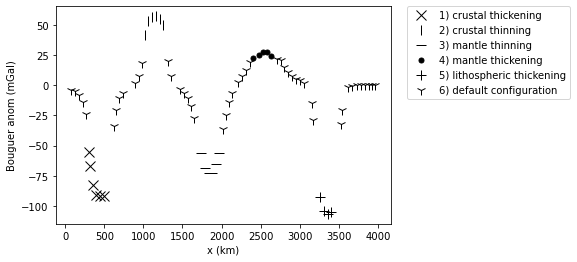

In [12]:
# Plotting the data.
marker_dict = {1:'x',
               2:'|',
               3:'_',
               4:'.',
               5:'+',
               6:'1'}

legend_labels = ['1) crustal thickening',
                 '2) crustal thinning',
                 '3) mantle thinning',
                 '4) mantle thickening',
                 '5) lithospheric thickening',
                 '6) default configuration']

groups = anom_df.groupby('type')
for name, group in groups:
    plt.plot(group['x (km)'],
             group['Bouguer anom (mGal)'],
             marker=marker_dict[name],
             linestyle='',
             markersize=10,
             label=name,
             color = (0,0,0))
plt.xlabel(xlabel = 'x (km)')
plt.ylabel(ylabel = 'Bouguer anom (mGal)')
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left', borderaxespad = 0, labels = legend_labels)

In [13]:
print('Network accuracy = {}'.format(accuracy_score(y_true = y_labels, y_pred = y_pred)))
print(classification_report(y_true = y_labels, y_pred = y_pred))

Network accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74
 samples avg       1.00      1.00      1.00        74



Within or at 200 epochs, the ANN converges to the correct solution. We will quantify the difference of including the quadratic features that were very beneficial to the other methods.

### With quadratic features

In [14]:
# Generating quadratic features using
# difference of two squares and cross terms.
anom_df['f12(A,B)'] = anom_df['Airy anom (mGal)']**2 - anom_df['Bouguer anom (mGal)']**2
anom_df['f12(B,G)'] = anom_df['Bouguer anom (mGal)']**2 - anom_df['Geoid anom (mGal)']**2
anom_df['f12(A,G)'] = anom_df['Airy anom (mGal)']**2 - anom_df['Geoid anom (mGal)']**2
anom_df['f22(A,B)'] = anom_df['Airy anom (mGal)']*anom_df['Bouguer anom (mGal)']
anom_df['f22(B,G)'] = anom_df['Bouguer anom (mGal)']*anom_df['Geoid anom (mGal)']
anom_df['f22(A,G)'] = anom_df['Airy anom (mGal)']*anom_df['Geoid anom (mGal)']

In [15]:
quad_input_list = ['Airy anom (mGal)', 'Bouguer anom (mGal)', 'Geoid anom (mGal)',
              'f12(A,B)', 'f12(B,G)', 'f12(A,G)', 'f22(A,B)', 'f22(B,G)', 'f22(A,G)']
scaler = StandardScaler()
X_values = scaler.fit_transform(anom_df[quad_input_list])
y_labels = anom_df[type_list].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_values,
                                                    y_labels,
                                                    test_size=0.33,
                                                    random_state=42)

In [17]:
keras_model = Sequential()
keras_model.add(Dense(units = 50, input_dim = len(quad_input_list), activation = 'relu', name = 'hidden_layer_1'))
keras_model.add(Dropout(rate = 0.25))
keras_model.add(Dense(units = 50, activation = 'relu', name = 'hidden_layer_2'))
keras_model.add(Dropout(rate = 0.25))
keras_model.add(Dense(units = output_length, activation = 'softmax', name = 'output_layer'))
keras_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
                                                         loss = 'categorical_crossentropy',
                                                         metrics = ['accuracy'])


In [18]:
keras_model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), epochs = 200)

Epoch 1/200
2/2 [==============================] - 0s 100ms/step - loss: 2.1178 - accuracy: 0.0000e+00 - val_loss: 2.0248 - val_accuracy: 0.0400
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 2.0312 - accuracy: 0.0000e+00 - val_loss: 1.9711 - val_accuracy: 0.0400
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 1.8906 - accuracy: 0.0408 - val_loss: 1.9188 - val_accuracy: 0.0400
Epoch 4/200
2/2 [==============================] - 0s 18ms/step - loss: 1.8403 - accuracy: 0.1633 - val_loss: 1.8667 - val_accuracy: 0.1600
Epoch 5/200
2/2 [==============================] - 0s 16ms/step - loss: 1.7395 - accuracy: 0.1837 - val_loss: 1.8167 - val_accuracy: 0.2800
Epoch 6/200
2/2 [==============================] - 0s 16ms/step - loss: 1.7503 - accuracy: 0.3061 - val_loss: 1.7672 - val_accuracy: 0.3600
Epoch 7/200
2/2 [==============================] - 0s 16ms/step - loss: 1.6617 - accuracy: 0.5306 - val_loss: 1.7181 - val_accuracy: 0.4400
Epoch 8/200

2/2 [==============================] - 0s 16ms/step - loss: 0.1844 - accuracy: 1.0000 - val_loss: 0.3078 - val_accuracy: 0.9200
Epoch 60/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1854 - accuracy: 0.9592 - val_loss: 0.2990 - val_accuracy: 0.9200
Epoch 61/200
2/2 [==============================] - 0s 16ms/step - loss: 0.2280 - accuracy: 0.9592 - val_loss: 0.2901 - val_accuracy: 0.9200
Epoch 62/200
2/2 [==============================] - 0s 7ms/step - loss: 0.1917 - accuracy: 0.9796 - val_loss: 0.2797 - val_accuracy: 0.9200
Epoch 63/200
2/2 [==============================] - 0s 16ms/step - loss: 0.2075 - accuracy: 0.9592 - val_loss: 0.2692 - val_accuracy: 0.9200
Epoch 64/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1750 - accuracy: 0.9796 - val_loss: 0.2600 - val_accuracy: 0.9200
Epoch 65/200
2/2 [==============================] - 0s 16ms/step - loss: 0.2024 - accuracy: 0.9592 - val_loss: 0.2510 - val_accuracy: 0.9200
Epoch 66/200
2/2 [=========

2/2 [==============================] - 0s 22ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 118/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0540 - accuracy: 0.9796 - val_loss: 0.0649 - val_accuracy: 1.0000
Epoch 119/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0417 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 1.0000
Epoch 121/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0464 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.0620 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0390 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 1.0000
Epoch 124/200
2/2 [==

Epoch 175/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 179/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 22ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 1

In [19]:
y_pred = keras_model.predict(x = X_values)

# Using function one_hot_conversion()
# to covert the Keras predictions into
# one hot vectors.
cluster = []
for index, obj in enumerate(y_pred):
    y_pred[index] = one_hot_conversion(obj, size = output_length)
    cluster.append(np.argmax(y_pred[index]) + 1)
anom_df['type (quad features)'] = cluster

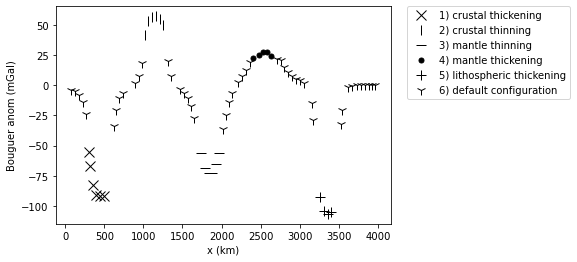

In [20]:
groups = anom_df.groupby('type (quad features)')
for name, group in groups:
    plt.plot(group['x (km)'],
             group['Bouguer anom (mGal)'],
             marker=marker_dict[name],
             linestyle='',
             markersize=10,
             label=name,
             color = (0,0,0))
plt.xlabel(xlabel = 'x (km)')
plt.ylabel(ylabel = 'Bouguer anom (mGal)')
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left', borderaxespad = 0, labels = legend_labels)

In [21]:
print('Network accuracy = {}'.format(accuracy_score(y_true = y_labels, y_pred = y_pred)))
print(classification_report(y_true = y_labels, y_pred = y_pred))

Network accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        47

   micro avg       1.00      1.00      1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74
 samples avg       1.00      1.00      1.00        74



Including the quadratic features mainly has implications in reducing the number of epochs needed for convergence. Both methods do reach convergence with or without the inclusion of these features, but since these additional features improve convergence in other models I suggest one includes them in an ANN anyway. The additional quadratic features are easy to generate and improve accuracy in other models significantly, by allowing the model to assess the joint values of different anomalies together instead of merely looking at a single anomaly at a time.